# Import the Data with Pandas

In [122]:
import pandas as pd

In [124]:
data = pd.read_csv("../input/simpsons_dataset.csv") 
data.head()

,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...


# API-Chat-Emotions Project

### 0. Importing libraries

In [1]:
import requests

### 1. User endpoints

- (GET) `/user/create/<username>`
  - **Purpose:** Create a user and save into DB
  - **Params:** `username` the user name
  - **Returns:** `user_id`

In [2]:
lista=['Homer Simpson','Marge Simpson','Lisa Simpson','Bart Simpson','Ned Flanders','Moe Szyslak']

In [3]:
for x in lista:
    requests.get(f"http://localhost:5000/user/create/{x}").text

### 2. Chat endpoints:

- (GET) `/chat/create`
  - **Purpose:** Create a conversation to load messages
  - **Params:** An array of users ids `[user_id]`
  - **Returns:** `chat_id`

In [4]:
chat_name="Party"
requests.get(f"http://localhost:5000/chat/create/{chat_name}").text

'Chat inserted'

- (GET) `/chat/<chat_id>/adduser/<user_name>`
  - **Purpose:** Add a user to a chat, this is optional just in case you want to add more users to a chat after it's creation.
  - **Params:** `user_id`
  - **Returns:** `chat_id`

In [5]:
chat_id=1
people=['Homer Simpson','Marge Simpson','Lisa Simpson','Bart Simpson','Ned Flanders','Moe Szyslak']

In [6]:
for x in people:
    print(requests.get(f"http://localhost:5000/chat/{chat_id}/adduser/{x}").text)

User inserted
User inserted
User inserted
User inserted
User inserted
User inserted


- (POST) `/chat/<chat_id>/addmessage`
  - **Purpose:** Add a message to the conversation. Help: Before adding the chat message to the database, check that the incoming user is part of this chat id. If not, raise an exception.
  - **Params:**
    - `chat_id`: Chat to store message
    - `user_id`: the user that writes the message
    - `text`: Message text
  - **Returns:** `message_id`

In [7]:
conversation = {"Mmm hors doovers":"Homer Simpson",
                "Homer, please. We've never thrown a party. Now we're gonna pay back all the friends who've invited us to their homes.":"Marge Simpson",
                "But Mom, I want to hear the witty banter of sophisticated adults.":"Lisa Simpson",
                "Yeah, you can't have any fun in bed.":"Bart Simpson",
                "Oh son, when you're older, you'll know better.":"Homer Simpson",
                "Hmmm. Oh, baby! Mmmm. Yeah.":"Homer Simpson",
                "Do we have enough glasses¿":"Marge Simpson",
                "Do we have enough gag ice cubs¿":"Homer Simpson",
                "Homer! Homer! Put a record on!":"Marge Simpson",
                "What are all our friends names again¿":"Homer Simpson",
                "Children! Go!":"Marge Simpson",
                "Hey, anybody mind if I serve as bartender¿ You know, I have a Ph.D in Mixology.":"Ned Flanders",
                "College boy.":"Moe Szyslak",
                "Hey, Homer! Care to try some of my Flanders Planters punch¿":"Ned Flanders",
                "Why not¿ I paid for it.":"Homer Simpson",
                "Hey, Flanders, next time why don't you put a little alcohol in it¿":"Homer Simpson",
                "Au contraire, Simpson! It has three shots of rum, a jigger of bourbon and just little dab-a-roo of creme de cassis for flavor.":"Ned Flanders",
                "Really¿ Well I do have a warm sense of well-being and I seem to be ssslurring my shpeech... you're right! Give me another.":"Homer Simpson",
                "Now, Homer, go easy on the al-ky-hol. Remember last year at the Winfield's party when you threw up in the laundry hamper¿":"Marge Simpson",
                "No.":"Homer Simpson",
               }

In [8]:
chat_id=1
for k,v in conversation.items():
    print(requests.get(f"http://localhost:5000/chat/{chat_id}/mensajes/{k}/adduser/{v}").text)

This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user is in the group, corresponding text inserted
This user 

- (GET) `/chat/<chat_id>/list`
  - **Purpose:** Get all messages from `chat_id`
  - **Returns:** json array with all messages from this `chat_id`

In [69]:
numero=1
lista=requests.get(f"http://localhost:5000/chat/{numero}/list").json()[0]['mensajes']
lista

[{'autor': 'Homer Simpson', 'texto': 'Mmm hors doovers'},
 {'autor': 'Marge Simpson',
  'texto': "Homer, please. We've never thrown a party. Now we're gonna pay back all the friends who've invited us to their homes."},
 {'autor': 'Lisa Simpson',
  'texto': 'But Mom, I want to hear the witty banter of sophisticated adults.'},
 {'autor': 'Bart Simpson', 'texto': "Yeah, you can't have any fun in bed."},
 {'autor': 'Homer Simpson',
  'texto': "Oh son, when you're older, you'll know better."},
 {'autor': 'Homer Simpson', 'texto': 'Hmmm. Oh, baby! Mmmm. Yeah.'},
 {'autor': 'Marge Simpson', 'texto': 'Do we have enough glasses¿'},
 {'autor': 'Homer Simpson', 'texto': 'Do we have enough gag ice cubs¿'},
 {'autor': 'Marge Simpson', 'texto': 'Homer! Homer! Put a record on!'},
 {'autor': 'Homer Simpson', 'texto': 'What are all our friends names again¿'},
 {'autor': 'Marge Simpson', 'texto': 'Children! Go!'},
 {'autor': 'Ned Flanders',
  'texto': 'Hey, anybody mind if I serve as bartender¿ You know

## Sentiment analysis

- (GET) `/chat/<chat_id>/sentiment`
  - **Purpose:** Analyze messages from `chat_id`. Use `NLTK` sentiment analysis package for this task
  - **Returns:** json with all sentiments from messages in the chat
​

In [14]:
import nltk

In [23]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/mariaroigporta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [118]:
list_sentiments=[]
lista_texto=[]
for x in range(len(conversation)):
    list_sentiments.append(sia.polarity_scores(lista[x]['texto']))

In [119]:
list_sentiments

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.146, 'neu': 0.639, 'pos': 0.216, 'compound': 0.4102},
 {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.5994},
 {'neg': 0.248, 'neu': 0.55, 'pos': 0.202, 'compound': -0.1285},
 {'neg': 0.0, 'neu': 0.707, 'pos': 0.293, 'compound': 0.4404},
 {'neg': 0.0, 'neu': 0.616, 'pos': 0.384, 'compound': 0.3595},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'compound': -0.34},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'compound': 0.4767},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 0.741, 'pos': 0.259, 'compound': 0.5411},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compou

## NLP Recommender System

- (GET) `/user/<user_id>/recommend`
  - **Purpose:** Recommend friend to this user based on chat contents
  - **Returns:** json array with top 3 similar users

In [68]:
from sklearn.feature_extraction.text import CountVectorizer

In [120]:
lista=requests.get(f"http://localhost:5000/chat/{numero}/list").json()[0]['mensajes']

In [136]:
count_vectorizer = CountVectorizer()

In [137]:
data = pd.DataFrame(lista)
data.head()

,autor,texto
0,Homer Simpson,Mmm hors doovers
1,Marge Simpson,"Homer, please. We've never thrown a party. Now..."
2,Lisa Simpson,"But Mom, I want to hear the witty banter of so..."
3,Bart Simpson,"Yeah, you can't have any fun in bed."
4,Homer Simpson,"Oh son, when you're older, you'll know better."


In [143]:
sparse_matrix = count_vectorizer.fit_transform(data['texto'])
m = sparse_matrix.todense()
m

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 1],
        [0, 0, 1, ..., 0, 1, 1],
        [0, 0, 0, ..., 0, 0, 0]])

In [154]:
doc_term_matrix = sparse_matrix.todense()

df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=data['autor'])
display(df)


,adults,again,al,alcohol,all,and,another,any,anybody,are,...,well,what,when,who,why,winfield,witty,yeah,year,you
autor,,,,,,,,,,,,,,,,,,,,,
Homer Simpson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Marge Simpson,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
Lisa Simpson,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
Bart Simpson,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
Homer Simpson,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,2
Homer Simpson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Marge Simpson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Homer Simpson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Marge Simpson,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
from sklearn.metrics.pairwise import cosine_similarity as distance

In [157]:
similarity_matrix = distance(df,df)

autor,Homer Simpson,Marge Simpson,Lisa Simpson,Bart Simpson,Homer Simpson,Homer Simpson,Marge Simpson,Homer Simpson,Marge Simpson,Homer Simpson,Marge Simpson,Ned Flanders,Moe Szyslak,Ned Flanders,Homer Simpson,Homer Simpson,Ned Flanders,Homer Simpson,Marge Simpson,Homer Simpson
autor,,,,,,,,,,,,,,,,,,,,
Homer Simpson,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Marge Simpson,0.0,1.000000,0.116052,0.000000,0.055556,0.000000,0.172133,0.145479,0.145479,0.145479,0.000000,0.000000,0.0,0.116052,0.000000,0.000000,0.000000,0.078567,0.210819,0.0
Lisa Simpson,0.0,0.116052,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.181818,0.000000,0.000000,0.167968,0.123091,0.165145,0.0
Bart Simpson,0.0,0.000000,0.000000,1.000000,0.204124,0.158114,0.158114,0.133631,0.000000,0.000000,0.000000,0.294174,0.0,0.000000,0.000000,0.204124,0.000000,0.144338,0.129099,0.0
Homer Simpson,0.0,0.055556,0.000000,0.204124,1.000000,0.129099,0.000000,0.000000,0.000000,0.000000,0.000000,0.240192,0.0,0.000000,0.000000,0.166667,0.000000,0.176777,0.158114,0.0
Homer Simpson,0.0,0.000000,0.000000,0.158114,0.129099,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Marge Simpson,0.0,0.172133,0.000000,0.158114,0.000000,0.000000,1.000000,0.676123,0.000000,0.000000,0.000000,0.124035,0.0,0.000000,0.000000,0.000000,0.000000,0.182574,0.000000,0.0
Homer Simpson,0.0,0.145479,0.000000,0.133631,0.000000,0.000000,0.676123,1.000000,0.000000,0.000000,0.000000,0.104828,0.0,0.000000,0.000000,0.000000,0.000000,0.154303,0.000000,0.0
Marge Simpson,0.0,0.145479,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.227921,0.000000,0.109109,0.000000,0.000000,0.207020,0.0


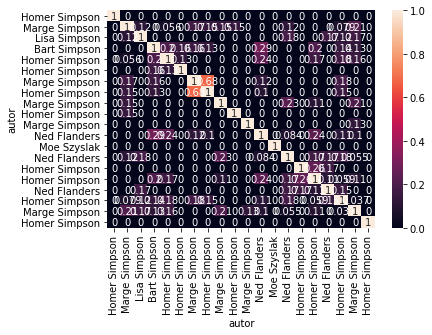

In [159]:
import seaborn as sns
sim_df = pd.DataFrame(similarity_matrix, columns=data['autor'], index=data['autor'])
display(sim_df)
sns.heatmap(sim_df,annot=True)

In [160]:
import numpy as np
np.fill_diagonal(sim_df.values, 0) # Remove diagonal max values and set those to 0
sim_df.idxmax()

autor
Homer Simpson    Homer Simpson
Marge Simpson    Marge Simpson
Lisa Simpson      Ned Flanders
Bart Simpson      Ned Flanders
Homer Simpson     Ned Flanders
Homer Simpson     Bart Simpson
Marge Simpson    Homer Simpson
Homer Simpson    Marge Simpson
Marge Simpson     Ned Flanders
Homer Simpson    Marge Simpson
Marge Simpson    Marge Simpson
Ned Flanders      Bart Simpson
Moe Szyslak      Homer Simpson
Ned Flanders     Marge Simpson
Homer Simpson    Homer Simpson
Homer Simpson    Homer Simpson
Ned Flanders      Lisa Simpson
Homer Simpson     Ned Flanders
Marge Simpson    Marge Simpson
Homer Simpson    Homer Simpson
dtype: object